<a href="https://colab.research.google.com/github/lukaszplust/ML_and_DL_projects/blob/main/Logistic_Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise
relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [142]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [143]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [145]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [146]:
X = df.drop('target', axis=1)

y = df['target']

Podział danych

In [147]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [148]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


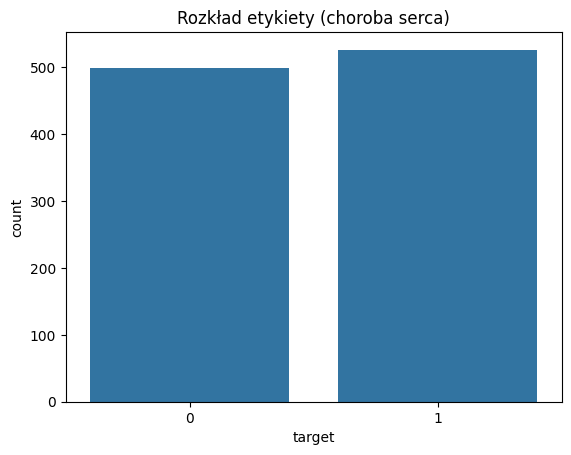

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [149]:
sns.countplot(x='target', data=df)
plt.title('Rozkład etykiety (choroba serca)')
plt.show()

# rozkład cech numerycznych
df.describe().T

Macierz Korelacji

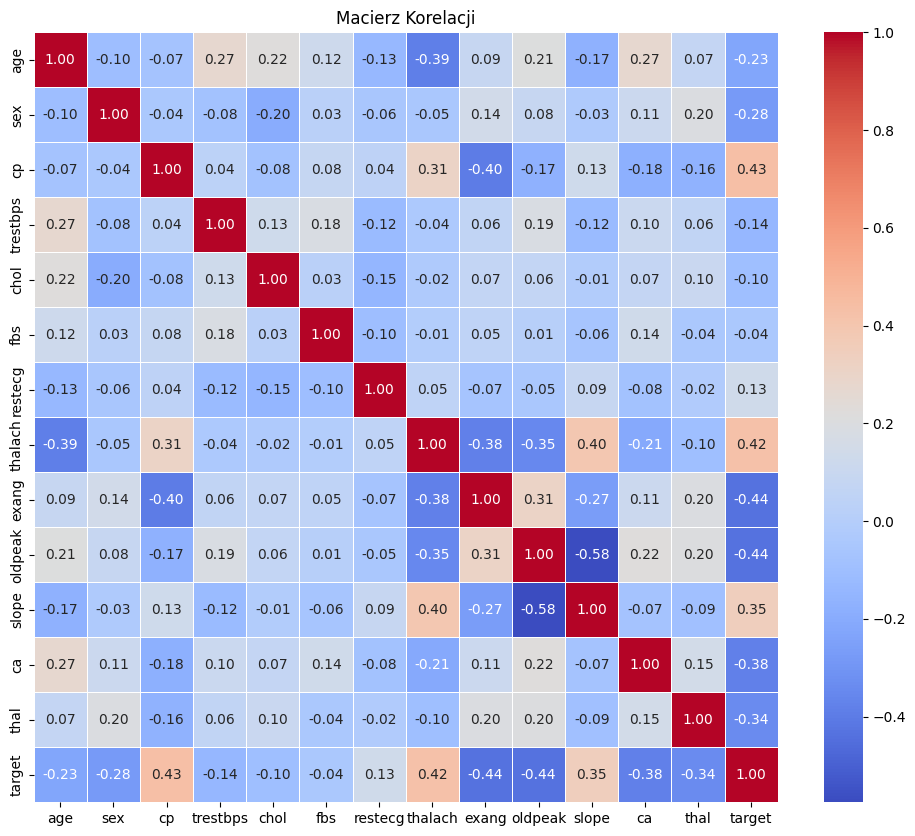

Usunięto cechy o korelacji powyżej 0.9 z innymi cechami: set()
Usunięto cechy o korelacji mniejszej niż 0.1 z etykietą 'target': ['chol', 'fbs']


In [150]:
# utworzenie macierzy korelacji
corr_matrix = df.corr()

# heatmapa korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz Korelacji')
plt.show()

# identyfikacja cech silnie skorelowanych z innymi
# ustalam próg korelacji (np. 0.9) dla usuwania cech o zbyt dużej korelacji
threshold = 0.9

# tworze liste cech do usunięcia
drop_columns = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # sprawdzam korelację
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # zmienna do usunięcia
            colname = corr_matrix.columns[i]
            drop_columns.add(colname)

# usuwam cechy silnie skorelowane
X = X.drop(columns=drop_columns)
print(f"Usunięto cechy o korelacji powyżej {threshold} z innymi cechami: {drop_columns}")

# usuwam cechy o słabej korelacji z etykietą
# etykieta to 'target'

# próg korelacji z etykietą
min_corr = 0.1

# obliczam korelację cech z etykietą
# korelacja bezwzględna
target_corr = df.corr()['target'].abs()

# wybieram cechy, które mają korelację z etykietą poniżej min_corr
weak_corr_columns = target_corr[target_corr < min_corr].index.tolist()

# usuwam te cechy
X = X.drop(columns=weak_corr_columns)
print(f"Usunięto cechy o korelacji mniejszej niż {min_corr} z etykietą 'target': {weak_corr_columns}")

In [151]:
X.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,1,168,0,1.0,2,2,3
1,53,1,0,140,0,155,1,3.1,0,0,3
2,70,1,0,145,1,125,1,2.6,0,0,3
3,61,1,0,148,1,161,0,0.0,2,1,3
4,62,0,0,138,1,106,0,1.9,1,3,2


Skalowanie Danych

In [152]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [153]:
X.head(1)

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,1,168,0,1.0,2,2,3


In [154]:
X_scaled[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552,  0.89125488,
        0.82132052, -0.71228712, -0.06088839,  0.99543334,  1.20922066,
        1.08985168])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [156]:
# utworzenie modelu regresji logistycznej
model = LogisticRegression()

# trening modelu
model.fit(X_train, y_train)

# predykcja
y_pred = model.predict(X_test)

In [157]:
from sklearn.metrics import classification_report

# raport
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       102
           1       0.78      0.91      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



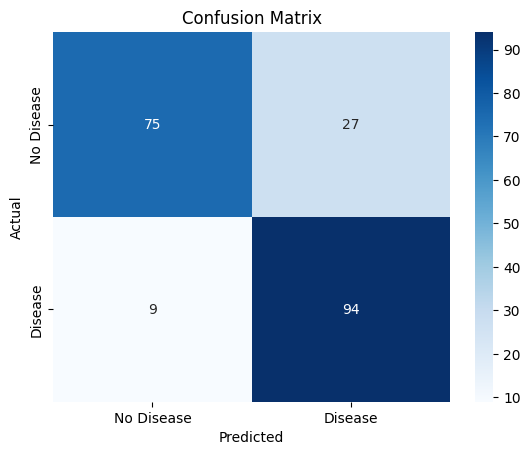

Accuracy: 0.824390243902439


In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)

AUC-ROC to krzywa, która pokazuje, jak dobrze model rozróżnia między klasami. Wartość AUC w zakresie 0.5–1.0 (gdzie 1.0 oznacza perfekcyjny model, a 0.5 losowy klasyfikator) jest uważana za miarę jakości modelu.

ROC Curve (Receiver Operating Characteristic) pokazuje stosunek czułości (True Positive Rate) do współczynnika fałszywych alarmów (False Positive Rate).

AUC to obszar pod tą krzywą, gdzie większa wartość oznacza lepszą jakość modelu

AUC-ROC: 0.82


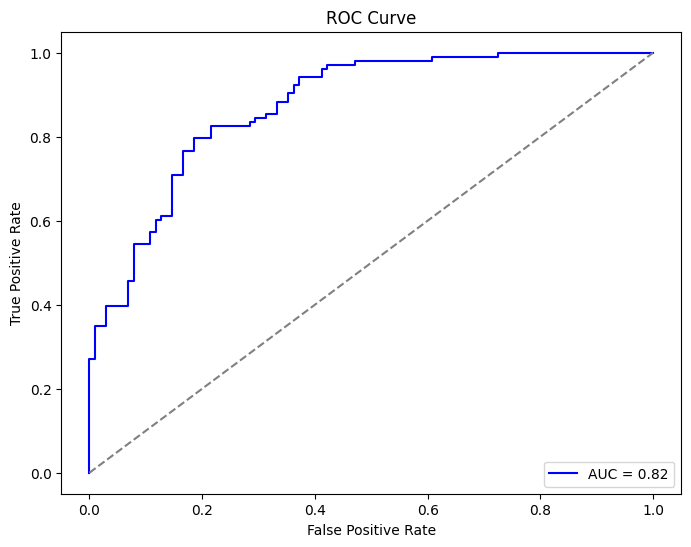

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {roc_auc:.2f}")

# krzywa ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##Log-Loss (Logarithmic Loss):

Log-Loss to miara błędu, która pokazuje, jak dobrze model przewiduje prawdopodobieństwa klas.

Im mniejsza wartość Log-Loss, tym lepszy model.

Jest to szczególnie użyteczne, gdy zależy Ci na dokładnym przewidywaniu prawdopodobieństw, a nie tylko na klasyfikacji.

In [109]:
from sklearn.metrics import log_loss

# obliczam Log-Loss
log_loss_value = log_loss(y_test, model.predict_proba(X_test))
print(f"Log-Loss: {log_loss_value:.2f}")

Log-Loss: 0.45


Cross-Validation (Walidacja Krzyżowa):

Aby upewnić się, że model jest stabilny i nie przetrenowany, należy wykonać walidację krzyżową.

Pozwoli to na ocenę modelu na różnych podzbiorach danych

In [110]:
from sklearn.model_selection import cross_val_score

# walidacja krzyżowa
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.86 ± 0.04


#From Scratch

PLAN:

1. Przygotowanie danych – normalizacja, podział na zestaw treningowy i testowy.

2. Funkcja sigmoidalna – przekształca liniową kombinację cech do prawdopodobieństwa.

3. Funkcja straty – oblicza różnicę między przewidywaniami a rzeczywistymi etykietami.

4. Spadek gradientu – optymalizuje współczynniki modelu.

5. Predykcja – oblicza wyniki dla nowych danych na podstawie wyuczonych współczynników.

In [159]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [160]:
X = df.drop('target', axis=1)

y = df['target']

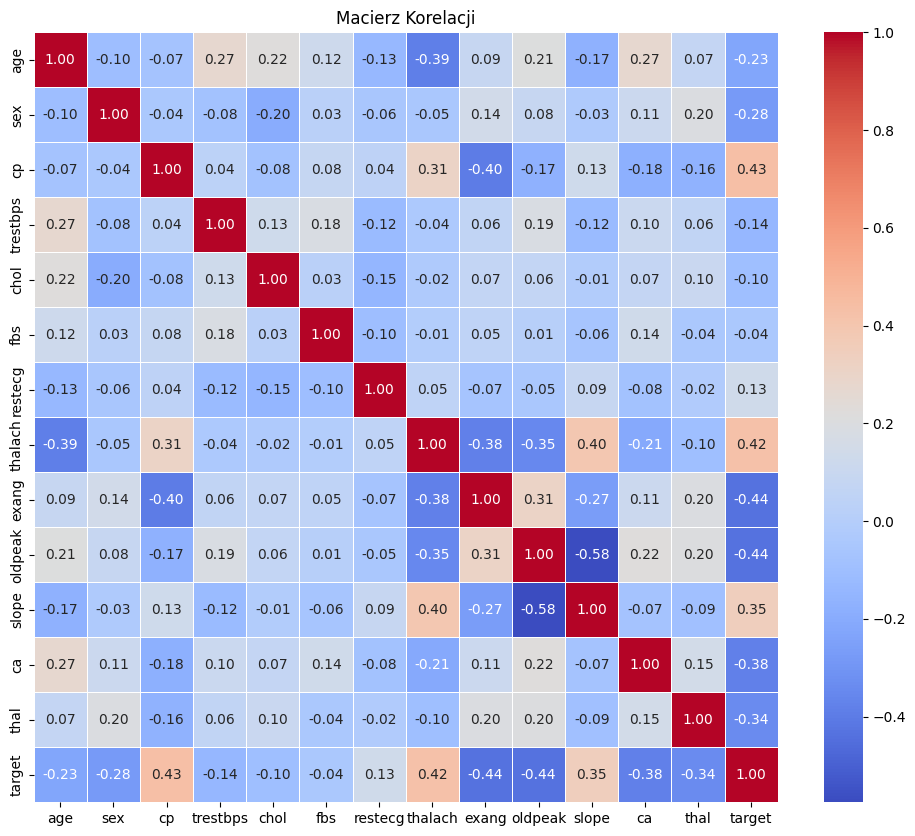

Usunięto cechy o korelacji powyżej 0.9 z innymi cechami: set()
Usunięto cechy o korelacji mniejszej niż 0.1 z etykietą 'target': ['chol', 'fbs']


In [161]:
# utworzenie macierzy korelacji
corr_matrix = df.corr()

# heatmapa korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz Korelacji')
plt.show()

# identyfikacja cech silnie skorelowanych z innymi
# ustalam próg korelacji (np. 0.9) dla usuwania cech o zbyt dużej korelacji
threshold = 0.9

# tworze liste cech do usunięcia
drop_columns = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # sprawdzam korelację
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # zmienna do usunięcia
            colname = corr_matrix.columns[i]
            drop_columns.add(colname)

# usuwam cechy silnie skorelowane
X = X.drop(columns=drop_columns)
print(f"Usunięto cechy o korelacji powyżej {threshold} z innymi cechami: {drop_columns}")

# usuwam cechy o słabej korelacji z etykietą
# etykieta to 'target'

# próg korelacji z etykietą
min_corr = 0.1

# obliczam korelację cech z etykietą
# korelacja bezwzględna
target_corr = df.corr()['target'].abs()

# wybieram cechy, które mają korelację z etykietą poniżej min_corr
weak_corr_columns = target_corr[target_corr < min_corr].index.tolist()

# usuwam te cechy
X = X.drop(columns=weak_corr_columns)
print(f"Usunięto cechy o korelacji mniejszej niż {min_corr} z etykietą 'target': {weak_corr_columns}")

In [162]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Inicjalizacja współczynników

In [164]:
m, n = X_train.shape  # m to liczba próbek, n to liczba cech
beta = np.zeros(n)  # inicjalizacja współczynnikow na zero (można też na losowe wartości)

In [165]:
m

820

In [166]:
n

11

In [167]:
beta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Funkcja sigmoidalna (logistyczna)

In [168]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [169]:
def cost_function(X, y, beta):
  m = len(y)
  z = np.dot(X, beta)
  h = sigmoid(z)
  cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
  return cost

Gradient Descent

In [170]:
def gradient_descent(X, y, beta, learning_rate, num_iterations):
  m = len(y)
  cost_history = []

  for _ in range(num_iterations):
    # obliczam prognozy i błędy
    z = np.dot(X, beta)
    h = sigmoid(z)

    # obliczam gradient
    gradient = (1/m) * np.dot(X.T, (h - y))

    # aktualizuje współczynniki
    beta = beta - learning_rate * gradient

    # obliczam i zapisuje koszt
    cost = cost_function(X, y, beta)
    cost_history.append(cost)

  return beta, cost_history

Trenowanie modelu

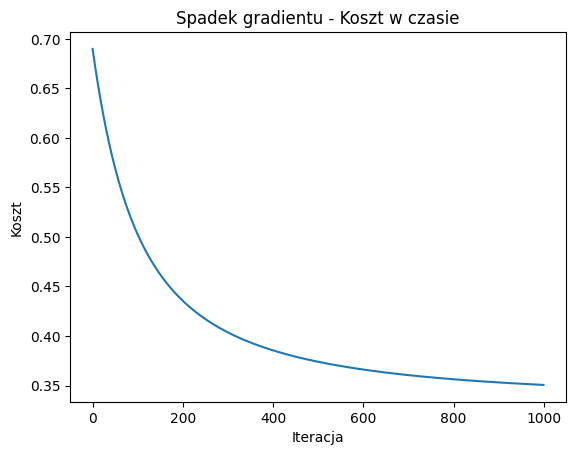

In [171]:
# dodanie kolumny 1 (wyraz wolny) do X
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# inicjalizacja parametrów
# Llczba cech + 1 (wyraz wolny)
beta = np.zeros(X_train_bias.shape[1])

# ustawiam parametry
learning_rate = 0.01
num_iterations = 1000

# trenowanie modelu
beta_optimal, cost_history = gradient_descent(X_train_bias, y_train, beta, learning_rate, num_iterations)

# wyświetlam koszty w trakcie treningu
plt.plot(cost_history)
plt.xlabel('Iteracja')
plt.ylabel('Koszt')
plt.title('Spadek gradientu - Koszt w czasie')
plt.show()

Predykcja

In [172]:
def predict(X, beta):
  z = np.dot(X, beta)
  return np.round(sigmoid(z))

# predykcja na danych testowych
y_pred = predict(X_test_bias, beta_optimal)

# ocena dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność: {accuracy * 100:.2f}%")

Dokładność: 80.00%


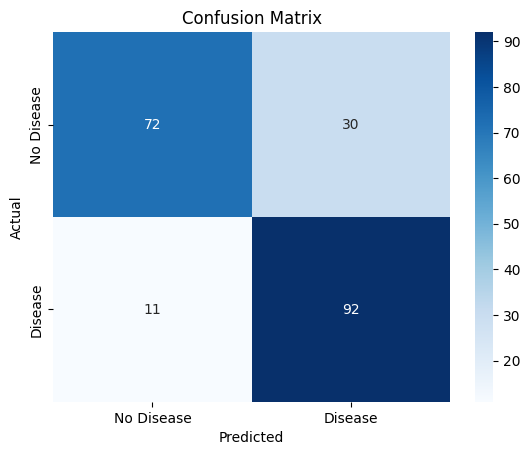

Accuracy: 0.8


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

AUC-ROC: 0.80


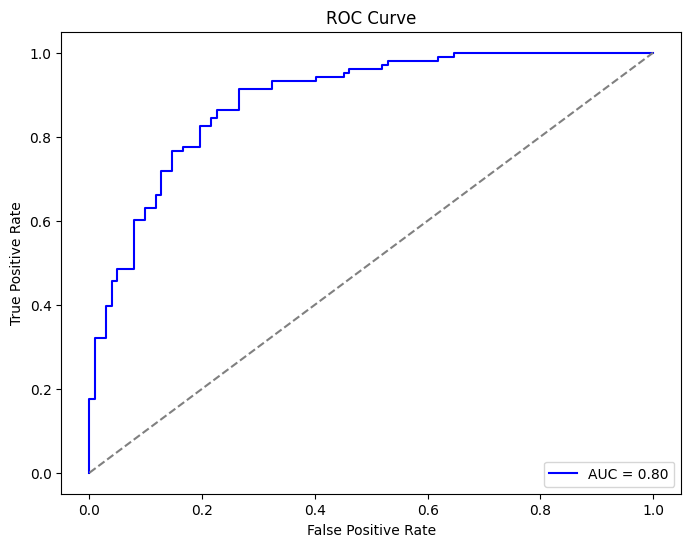

In [174]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {roc_auc:.2f}")

# krzywa ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [176]:
from sklearn.metrics import log_loss

# obliczam Log-Loss
log_loss_value = log_loss(y_test, model.predict_proba(X_test))
print(f"Log-Loss: {log_loss_value:.2f}")

Log-Loss: 0.43


In [175]:
from sklearn.model_selection import cross_val_score

# walidacja krzyżowa
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.86 ± 0.04
